## 📘 Análisis Estadístico Descriptivo de Autos Usados en India

### 📌 Contexto

El dataset utilizado proviene del portal **CarDekho**, una plataforma india de venta de autos nuevos y usados. Contiene información de miles de autos listados en India con variables como:

* Marca del auto
* Año de fabricación
* Precio de venta
* Tipo de combustible
* Número de propietarios
* Transmisión
* Kilometraje recorrido

El objetivo de esta notebook es aplicar técnicas de estadística descriptiva y visualización de datos para entender mejor la distribución de precios, el estado general de los autos y sus características clave.

### 🔧 1. Carga de librerías y datos

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
# Configura el estilo de los gráficos de Matplotlib para usar el tema 'ggplot', que es un estilo
# popular inspirado en el paquete de visualización R ggplot2, con colores atractivos y fondo gris.
plt.style.use('ggplot')

# Configura Seaborn para:
# font_scale=1.1: Aumenta el tamaño de la fuente en los gráficos de Seaborn en un 10% sobre
# el tamaño por defecto para mejor legibilidad.
sns.set(font_scale=0.8)

# Cargar el dataset
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

# Mostrar las primeras filas
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### 🔍 2. Exploración inicial del dataset

In [93]:
# Dimensiones
print("Filas y columnas:", df.shape)

# Nombres de columnas
print("Columnas:", df.columns)

Filas y columnas: (4340, 8)
Columnas: Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')


In [94]:
# Tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [95]:
# Estadísticas básicas
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


### 📊 3. Medidas de tendencia central

Vamos a calcular la media, mediana y moda del precio de venta (selling_price) y los kilómetros recorridos (km_driven).

In [96]:
# Precio de venta
print("Media precio:", df['selling_price'].mean())
print("Mediana precio:", df['selling_price'].median())
print("Moda precio:", df['selling_price'].mode()[0])

# Kilometraje
print("Media km:", df['km_driven'].mean())
print("Mediana km:", df['km_driven'].median())
print("Moda km:", df['km_driven'].mode()[0])


Media precio: 504127.3117511521
Mediana precio: 350000.0
Moda precio: 300000
Media km: 66215.77741935484
Mediana km: 60000.0
Moda km: 70000


### 📈 4. Medidas de dispersión
Calculamos el rango, la varianza y la desviación estándar.

In [97]:
# Rango
print("Rango precio:", df['selling_price'].max() - df['selling_price'].min())

# Varianza y desviación estándar
print("Varianza precio:", df['selling_price'].var())
print("Desviación estándar precio:", df['selling_price'].std())

print("Varianza km:", df['km_driven'].var())
print("Desviación estándar km:", df['km_driven'].std())


Rango precio: 8880000
Varianza precio: 334718640087.9015
Desviación estándar precio: 578548.7361388853
Varianza km: 2175672269.4489436
Desviación estándar km: 46644.102193620834


### 📉 5. Visualización de variables numéricas

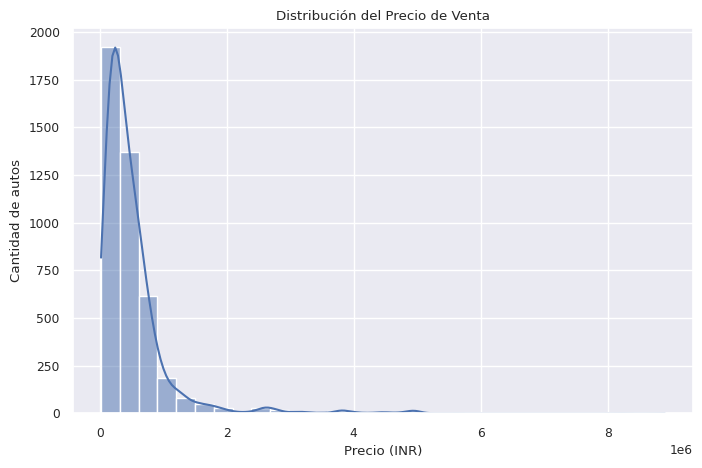

In [98]:
# Histograma de precios
plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title('Distribución del Precio de Venta')
plt.xlabel('Precio (INR)')
plt.ylabel('Cantidad de autos')
plt.show()

* El gráfico muestra una distribución altamente sesgada hacia la derecha, típica de precios o ingresos.

* Esto implica que la gran mayoría de los autos tienen precios bajos (concentrados en el extremo izquierdo del gráfico), y solo unos pocos tienen precios muy altos, que estiran el eje x.



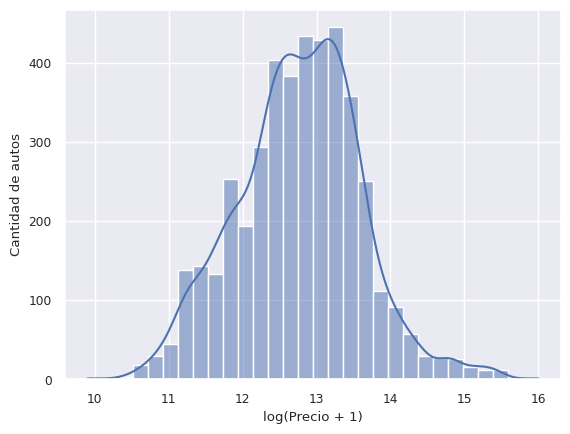

In [99]:
# La variable selling_price tiene valores que van desde 20,000 a 8,900,000, es decir, una escala muy amplia y sesgada.
# Se aplica log1p reduce la asimetría y permite ver mejor los patrones ocultos, como si fuera "acercar la lupa" al grupo más denso de datos.
# Esta transformación comprime valores grandes y expande valores pequeños, lo cual ayuda a visualizar mejor distribuciones muy sesgadas

sns.histplot(np.log1p(df['selling_price']), bins=30, kde=True)
plt.xlabel("log(Precio + 1)")
plt.ylabel("Cantidad de autos")
plt.show()

Distribución simétrica y unimodal
* La forma general del histograma es aproximadamente simétrica y presenta una única moda (pico).

* Esto indica que hay un rango de precios dominante donde se concentran la mayoría de los autos.

Rango central más denso: entre log(12) y log(14)
* La mayor densidad de autos se encuentra en el rango de valores logarítmicos entre 12 y 14.

In [100]:
# Si revertimos la transformación con np.expm1():
print(np.expm1(12).round())
print(np.expm1(14).round())

162754.0
1202603.0


Esto significa que la mayoría de los autos tienen un precio entre ~160,000 y ~1.2 millones INR.

Valores extremos (colas)
* Hay autos con precios mucho menores y mucho mayores, pero en baja cantidad (colas del gráfico, entre log(10) y log(11), y de log(15) en adelante).

* Esto indica que hay outliers: algunos autos muy baratos o muy caros, pero no representan a la mayoría.

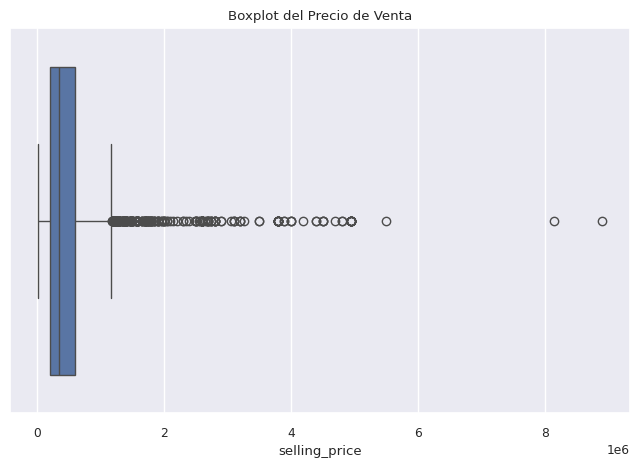

In [101]:
# Boxplot para detectar outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df['selling_price'])
plt.title('Boxplot del Precio de Venta')
plt.show()

Distribución asimétrica a la derecha (sesgo positivo):
* La mayoría de los datos están agrupados hacia la izquierda (precios bajos).
* Hay una cola larga de valores altos hacia la derecha, lo cual indica presencia de precios de venta muy altos en comparación con la mayoría.

Presencia de muchos outliers (valores atípicos):
* Los puntos individuales a la derecha del bigote superior son valores que el boxplot considera como atípicos.
* Esto sugiere que hay muchas ventas con precios considerablemente más altos que el rango intercuartílico (IQR).

Mediana desplazada a la izquierda:
* La línea dentro de la caja representa la mediana del selling_price. Está más cerca del límite inferior de la caja, lo que refuerza la asimetría hacia la derecha.

Caja pequeña en proporción al rango total¨:
* Esto indica que el 50% central de los datos (entre el Q1 y Q3) tiene una variación mucho menor que el resto de los datos (los outliers se extienden bastante).


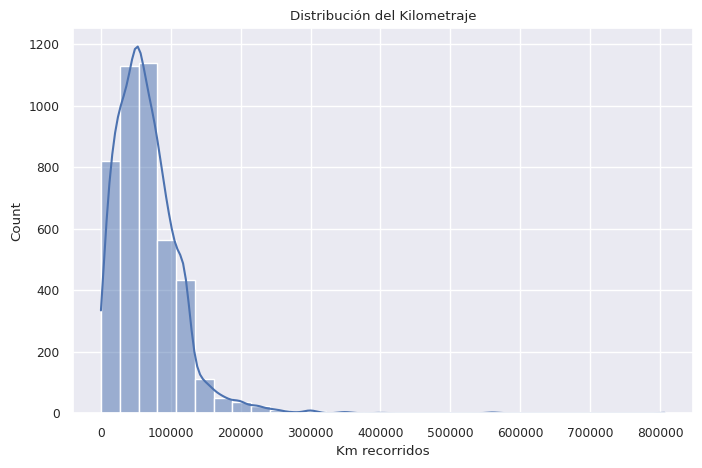

In [102]:
# Histograma del kilometraje
plt.figure(figsize=(8,5))
sns.histplot(df['km_driven'], bins=30, kde=True)
plt.title('Distribución del Kilometraje')
plt.xlabel('Km recorridos')
plt.show()

### 🔗 6. Relación entre variables

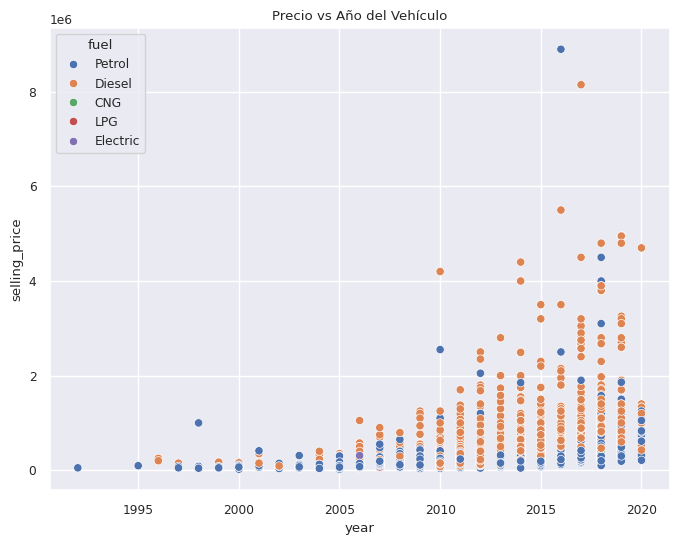

,selling_price,year,km_driven
selling_price,1.000000,0.413922,-0.192289
year,0.413922,1.000000,-0.419688
km_driven,-0.192289,-0.419688,1.000000


In [103]:
# Precio vs Año
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='year', y='selling_price', hue='fuel')
plt.title('Precio vs Año del Vehículo')
plt.show()

# Correlación numérica
df[['selling_price', 'year', 'km_driven']].corr()


## ✅ Actividades Prácticas

1. ¿Cuál es el promedio de autos listados por año? Graficá la cantidad de autos por año.
2. Calculá la media, mediana y moda del `year` (año del vehículo).
3. Realizá un boxplot del kilometraje recorrido (`km_driven`) para detectar outliers.
4. Calculá el rango, varianza y desviación estándar del `year`.
5. Hacé un histograma del `selling_price` para autos que usan combustible "Diesel".
6. Graficá la distribución de autos por tipo de transmisión (`manual` vs `automatic`).
7. ¿Cuál es la relación entre el tipo de combustible (`fuel`) y el precio promedio de venta?
8. Usando un `groupby`, obtené el precio medio por año de fabricación.
9. Mostrá en un gráfico de barras cuántos autos pertenecen a cada número de dueños (`owner`).
10. Calculá las medidas de dispersión para el precio de autos automáticos únicamente.

1. ¿Cuál es el promedio de autos listados por año? Graficá la cantidad de autos por año.

El promedio de autos listados por año es: 160.74


/tmp/ipython-input-104-3179926138.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year', palette='viridis')


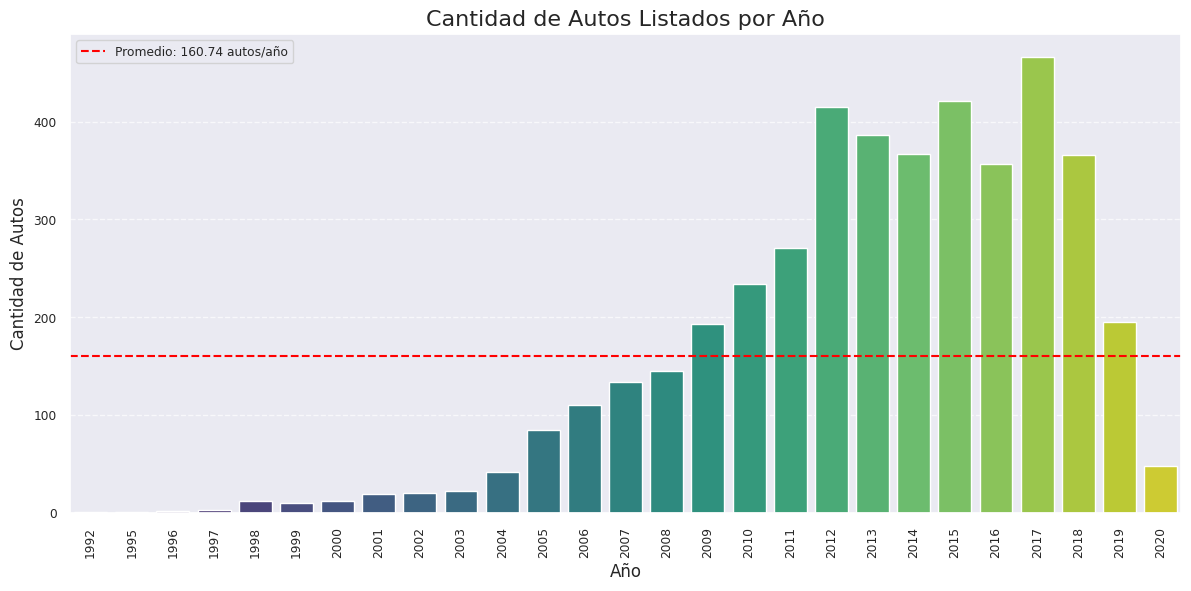

In [104]:
# 1. Calcular el promedio de autos por año
autos_por_año = df['year'].dropna().value_counts().sort_index()
promedio_autos = autos_por_año.mean()

print(f"El promedio de autos listados por año es: {promedio_autos:.2f}")

# 2. Graficar la cantidad de autos por año
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year', palette='viridis')
plt.title('Cantidad de Autos Listados por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de Autos', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el promedio como línea horizontal
plt.axhline(y=promedio_autos, color='red', linestyle='--',
            label=f'Promedio: {promedio_autos:.2f} autos/año')
plt.legend()

plt.tight_layout()
plt.show()

2. Calculá la media, mediana y moda del `year` (año del vehículo).

In [105]:
# Calcular media, mediana y moda del año
mean_year = np.mean(df['year'])
median_year = np.median(df['year'])
mode_year = df['year'].mode().values[0]  # La moda puede tener múltiples valores, tomamos el primero

# Mostrar los resultados
print(f"Media del año: {mean_year:.2f}")
print(f"Mediana del año: {median_year}")
print(f"Moda del año: {mode_year}")

Media del año: 2013.09
Mediana del año: 2014.0
Moda del año: 2017


3. Realizá un boxplot del kilometraje recorrido (`km_driven`) para detectar outliers.

Estadísticas descriptivas de km_driven:
count      4340.000000
mean      66215.777419
std       46644.102194
min           1.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: km_driven, dtype: float64


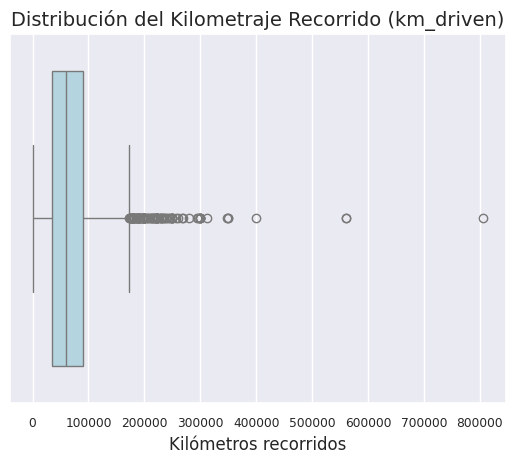

In [106]:
# Crear el boxplot
ax = sns.boxplot(x=df['km_driven'], color='lightblue')

# Añadir título y etiquetas
plt.title('Distribución del Kilometraje Recorrido (km_driven)', fontsize=14)
plt.xlabel('Kilómetros recorridos', fontsize=12)

# Mostrar valores estadísticos clave
stats = df['km_driven'].describe()
print("Estadísticas descriptivas de km_driven:")
print(stats)

# Mostrar el gráfico
plt.show()

Distribución asimétrica a la derecha (positivamente sesgada):
* La mayor parte de los datos está concentrada entre 0 y aproximadamente 150,000 km.
* Sin embargo, hay valores muy altos (más de 200,000 km e incluso cercanos a 800,000 km) que generan una cola larga a la derecha.

Outliers (valores atípicos):
* Muchos puntos individuales fuera de los "bigotes" del boxplot indican valores atípicos.
* Estos representan autos con kilometrajes mucho mayores al promedio y a los valores típicos del dataset.
* Estos outliers pueden afectar análisis estadísticos como la media, por lo que podría ser útil tratarlos (por ejemplo, usando la mediana o transformaciones logarítmicas).

Mediana desplazada hacia la izquierda:
* La línea que representa la mediana está más cerca del primer cuartil que del tercero, lo que refuerza la idea de que la distribución está sesgada positivamente

Text(0.5, 0, 'Kilómetros recorridos')

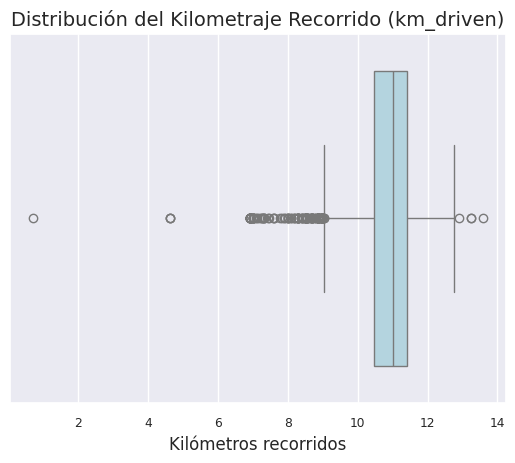

In [107]:
# Transformación logarítmica
ax = sns.boxplot(x=np.log1p(df['km_driven']), color='lightblue')

# Añadir título y etiquetas
plt.title('Distribución del Kilometraje Recorrido (km_driven)', fontsize=14)
plt.xlabel('Kilómetros recorridos', fontsize=12)

In [108]:
print(np.expm1(6).round())
print(np.expm1(10).round())

402.0
22025.0


Distribución sesgada a la derecha (positivamente)
* Aunque se usó el logaritmo, todavía se ven muchos valores concentrados en el extremo inferior (izquierda) y una “cola” que se extiende hacia la derecha.

* Esto indica que la mayoría de los autos tiene un kilometraje bajo o medio, y hay algunos pocos con kilometraje muy alto (outliers).

Outliers:
* Se ven puntos individuales fuera del bigote derecho e izquierdo del boxplot: estos son autos con kilometraje inusualmente bajo o alto.

* El logaritmo suaviza un poco los outliers extremos, pero siguen presentes.

* La mayoría de los autos del dataset tienen un kilometraje medio-bajo.
* Hay una alta concentración de datos entre log(6) y log(10), que se traduce en valores reales entre aproximadamente 400 km y 22,000 km.
* Existen varios outliers, especialmente en los valores altos de kilometraje

4. Calculá el rango, varianza y desviación estándar del `year`.

In [109]:
# Calcular el rango
year_range = df['year'].max() - df['year'].min()

# Calcular la varianza
year_variance = np.var(df['year'])

# Calcular la desviación estándar
year_std_dev = np.std(df['year'])

print(f"Rango del año: {year_range}")
print(f"Varianza del año: {year_variance:.2f}")
print(f"Desviación estándar del año: {year_std_dev:.2f}")

Rango del año: 28
Varianza del año: 17.77
Desviación estándar del año: 4.21


5. Hacé un histograma del `selling_price` para autos que usan combustible "Diesel".

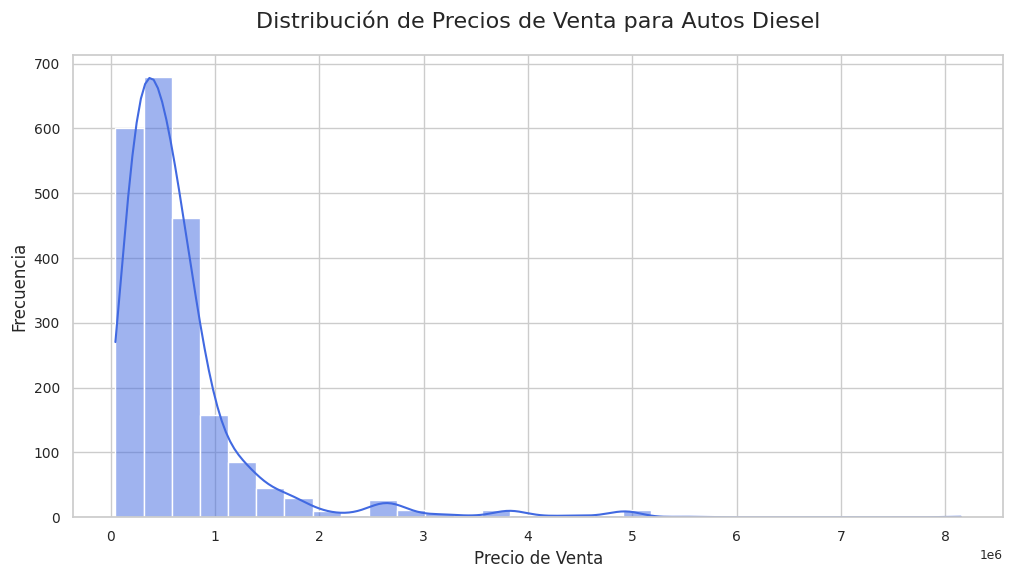

In [110]:
# Filtrar solo los autos diesel
diesel_cars = df[df['fuel'] == 'Diesel']

# Configurar el estilo de seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

# Crear el histograma
hist = sns.histplot(data=diesel_cars, x='selling_price', bins=30, kde=True, color='royalblue')

# Configuraciones adicionales del gráfico
plt.title('Distribución de Precios de Venta para Autos Diesel', fontsize=16, pad=20)
plt.xlabel('Precio de Venta', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el gráfico
plt.show()

/tmp/ipython-input-111-362914082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diesel_cars['log_price'] = np.log1p(diesel_cars['selling_price'])


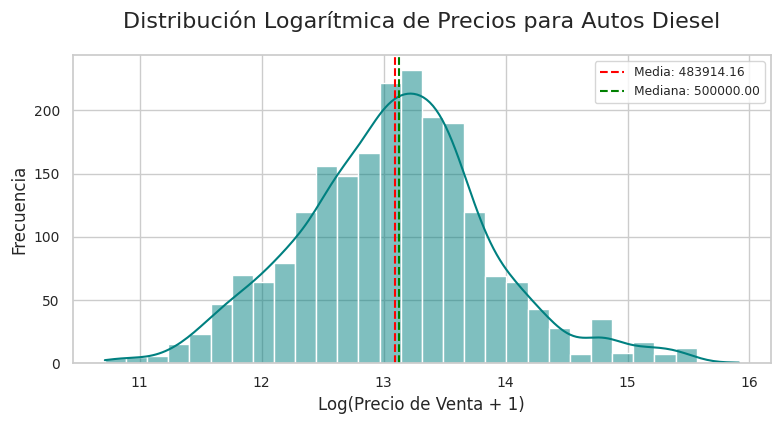

In [111]:
# Aplicar transformación logarítmica (log1p para manejar ceros)
diesel_cars['log_price'] = np.log1p(diesel_cars['selling_price'])

# Configuración del gráfico
plt.figure(figsize=(9, 4))
sns.set_style('whitegrid')

# Crear histograma con KDE
ax = sns.histplot(data=diesel_cars, x='log_price', bins=30,
                 kde=True, color='teal')

# Calcular estadísticas descriptivas
mean_log = diesel_cars['log_price'].mean()
median_log = diesel_cars['log_price'].median()

# Añadir líneas de referencia
ax.axvline(mean_log, color='red', linestyle='--', linewidth=1.5,
           label=f'Media: {np.expm1(mean_log):.2f}')
ax.axvline(median_log, color='green', linestyle='--', linewidth=1.5,
           label=f'Mediana: {np.expm1(median_log):.2f}')

# Configurar etiquetas y título
plt.title('Distribución Logarítmica de Precios para Autos Diesel', fontsize=16, pad=20)
plt.xlabel('Log(Precio de Venta + 1)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()

# Mostrar el gráfico
plt.show()

In [112]:
# Si revertimos la transformación con np.expm1():

# Valores en los que se encuentran los precios
print(np.expm1(11).round())
print(np.expm1(16).round())

# Mayor concentracion de vehiculos
print(np.expm1(13).round())
print(np.expm1(14).round())


59873.0
8886110.0
442412.0
1202603.0


Transformación logarítmica
* El gráfico muestra una distribución más simétrica gracias a la transformación logarítmica (log1p), lo que sugiere que los precios originales tenían una distribución fuertemente sesgada a la derecha.

Rango de precios
* Los valores en el eje X (11-16) representan log(precio+1), lo que corresponde aproximadamente a precios entre 59,873 (e^11) y 8,886,110 (e^16) en escala original.

Medidas de tendencia central:
* La media (483,914) es ligeramente menor que la mediana (500,000), lo que indica una ligera asimetría izquierda en la distribución transformada.
* Esta proximidad entre media y mediana confirma que la transformación logarítmica ha normalizado efectivamente los datos.

Distribución de frecuencias
* La mayor concentración de vehículos parece estar alrededor de los 13-14 en escala logarítmica (aproximadamente 442,000 - 1,202,000).
* La frecuencia disminuye gradualmente hacia ambos extremos, mostrando una distribución aproximadamente normal en escala logarítmica.

6. Graficá la distribución de autos por tipo de transmisión (manual vs automatic).

In [113]:
# Verificar los valores únicos en la columna 'transmission'
print(df['transmission'].unique())

['Manual' 'Automatic']


/tmp/ipython-input-114-3046547380.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=transmission_counts.index, y=transmission_counts.values, palette="viridis")


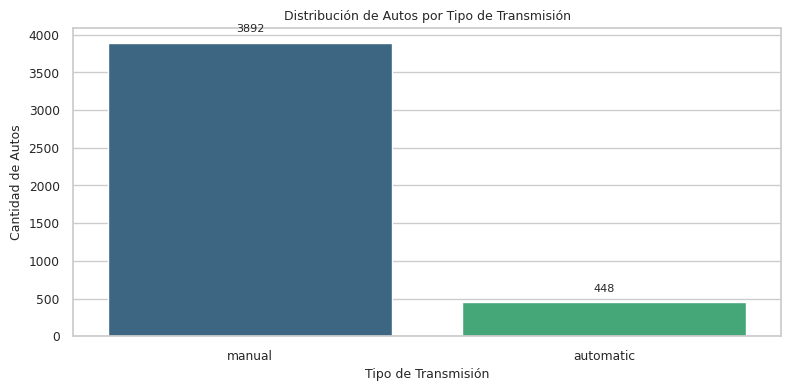

In [114]:
# Limpiar y estandarizar los datos de transmisión
df['transmission'] = df['transmission'].str.lower().str.strip()

# Contar la cantidad de autos por tipo de transmisión
transmission_counts = df['transmission'].value_counts()

# Crear el gráfico
plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")

# Gráfico de barras
ax = sns.barplot(x=transmission_counts.index, y=transmission_counts.values, palette="viridis")

# Añadir título y etiquetas
plt.title('Distribución de Autos por Tipo de Transmisión', fontsize=9)
plt.xlabel('Tipo de Transmisión', fontsize=9)
plt.ylabel('Cantidad de Autos', fontsize=9)

# Añadir los valores en las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=8)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

7. ¿Cuál es la relación entre el tipo de combustible (`fuel`) y el precio promedio de venta?

/tmp/ipython-input-115-1762996935.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='fuel', y='selling_price', data=fuel_price, palette="viridis", order=fuel_price['fuel'])


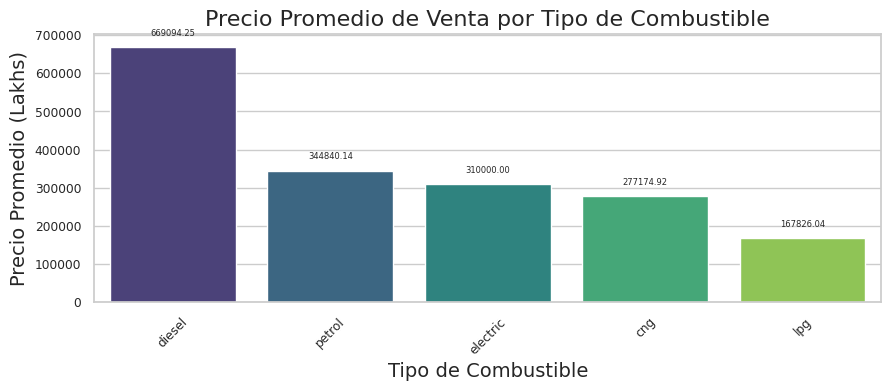

In [115]:
# Limpieza de datos
df['fuel'] = df['fuel'].str.lower().str.strip()

# Calcular precios promedio por tipo de combustible
fuel_price = df.groupby('fuel')['selling_price'].mean().sort_values(ascending=False)

#Se restablece el índice del dataframe, para evitar error en el grafico
fuel_price = fuel_price.reset_index()

# Crear visualización
plt.figure(figsize=(9, 4))
sns.set_style("whitegrid")

# Gráfico de barras
ax = sns.barplot(x='fuel', y='selling_price', data=fuel_price, palette="viridis", order=fuel_price['fuel'])

# Añadir detalles al gráfico
plt.title('Precio Promedio de Venta por Tipo de Combustible', fontsize=16)
plt.xlabel('Tipo de Combustible', fontsize=14)
plt.ylabel('Precio Promedio (Lakhs)', fontsize=14)
plt.xticks(rotation=45)

# Añadir valores en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', #Obtiene la altura de la barra
                (p.get_x() + p.get_width() / 2., p.get_height()), #Posicion del texto
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=6)

plt.tight_layout()
plt.show()

* Los autos diesel tienen el precio promedio más alto, siendo aproximadamente 74% más caros que los de gasolina.
* Los vehículos a gasolina (petrol) ocupan el segundo lugar
* Los combustibles alternativos (CNG y LPG) muestran los precios promedio más bajos, lo que podría indicar que son opciones más económicas o que se aplican principalmente a modelos más accesibles.

8. Usando un `groupby`, obtené el precio medio por año de fabricación.

In [116]:
# Calcular el precio medio por año
price_by_year = df.groupby('year')['selling_price'].mean().reset_index()

# Ordenar por año
price_by_year = price_by_year.sort_values('year')

print(price_by_year)

    year  selling_price
0   1992   5.000000e+04
1   1995   9.500000e+04
2   1996   2.250000e+05
3   1997   9.300000e+04
4   1998   2.140000e+05
5   1999   7.350000e+04
6   2000   8.150000e+04
7   2001   1.176499e+05
8   2002   9.071429e+04
9   2003   8.656522e+04
10  2004   1.217500e+05
11  2005   1.090130e+05
12  2006   1.577999e+05
13  2007   1.628284e+05
14  2008   1.742013e+05
15  2009   2.295647e+05
16  2010   2.696781e+05
17  2011   2.936383e+05
18  2012   3.716289e+05
19  2013   4.848010e+05
20  2014   5.232316e+05
21  2015   5.289430e+05
22  2016   6.083641e+05
23  2017   7.689098e+05
24  2018   9.107705e+05
25  2019   1.059020e+06
26  2020   8.184791e+05


(array([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(1990.0, 0, '1990'),
  Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025')])

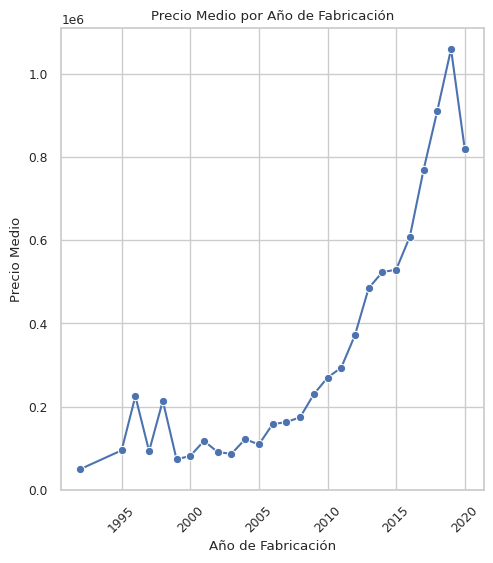

In [117]:
# Visualización
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Gráfico de línea
plt.subplot(1, 2, 1)
sns.lineplot(x='year', y='selling_price', data=price_by_year, marker='o', color='b')
plt.title('Precio Medio por Año de Fabricación')
plt.xlabel('Año de Fabricación')
plt.ylabel('Precio Medio')
plt.xticks(rotation=45)

* Los autos más nuevos (2018-2020) tienen precios medios más altos

* Los autos más viejos (1995-2005) tienen precios medios más bajos

* Hay una clara correlación positiva entre el año de fabricación y el precio de venta

9. Mostrá en un gráfico de barras cuántos autos pertenecen a cada número de dueños (`owner`).

/tmp/ipython-input-118-3198311172.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=owner_counts.index, y=owner_counts.values, palette='viridis')


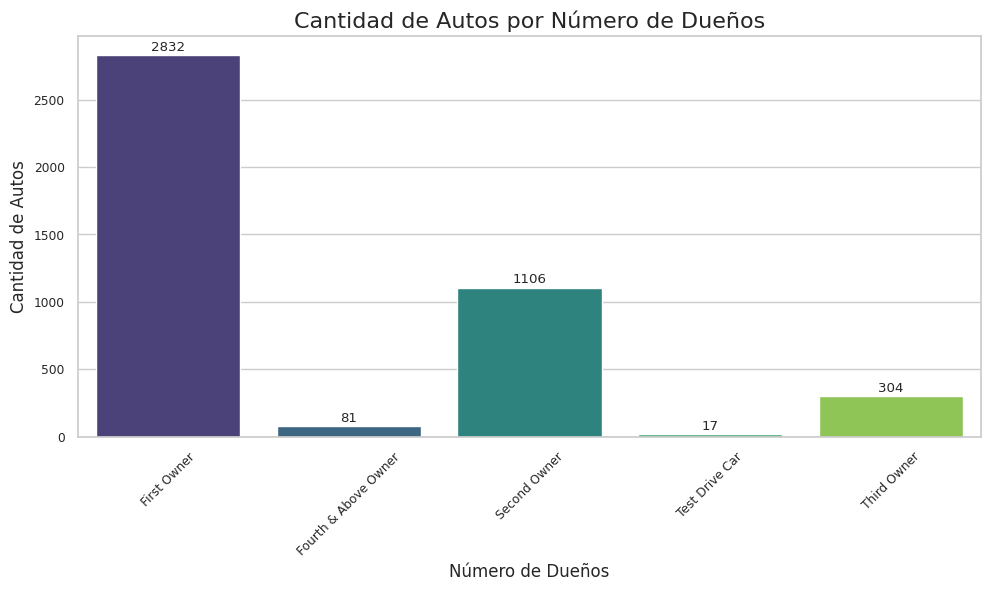

In [118]:
# Limpiar y estandarizar los valores de 'owner'
df['owner'] = df['owner'].str.strip()  # Eliminar espacios en blanco

# Contar la cantidad de autos por cada categoría de dueño
owner_counts = df['owner'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=owner_counts.index, y=owner_counts.values, palette='viridis')

# Añadir título y etiquetas
plt.title('Cantidad de Autos por Número de Dueños', fontsize=16)
plt.xlabel('Número de Dueños', fontsize=12)
plt.ylabel('Cantidad de Autos', fontsize=12)
plt.xticks(rotation=45)

# Añadir los valores en las barras
# enumerate() itera sobre los valores (v) y sus índices (i) de owner_counts.values.
for i, v in enumerate(owner_counts.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

10. Calculá las medidas de dispersión para el precio de autos automáticos únicamente.

In [119]:
# Verificar
df['transmission'] = df['transmission'].str.strip().str.lower()

# Filtrar solo autos automáticos
automatic_cars = df[df['transmission'] == 'automatic']

# Calcular medidas de dispersión
price_stats = {
    'Rango': automatic_cars['selling_price'].max() - automatic_cars['selling_price'].min(),
    'Varianza': automatic_cars['selling_price'].var(),
    'Desviación Estándar': automatic_cars['selling_price'].std(),
    'Coeficiente de Variación': (automatic_cars['selling_price'].std() / automatic_cars['selling_price'].mean()) * 100,
    'Rango Intercuartílico (IQR)': automatic_cars['selling_price'].quantile(0.75) - automatic_cars['selling_price'].quantile(0.25)
}

# Mostrar las medidas de dispersión
print("Medidas de dispersión para precios de autos automáticos:")
for stat, value in price_stats.items():
    print(f"{stat}: {value:,.2f}")


Medidas de dispersión para precios de autos automáticos:
Rango: 8,821,000.00
Varianza: 1,650,915,276,494.94
Desviación Estándar: 1,284,879.48
Coeficiente de Variación: 91.25
Rango Intercuartílico (IQR): 1,280,000.00
